In [1]:
from google.colab import drive

drive.mount('/content/drive')
file_path = '/content/drive/My Drive/UAP/predic_tabel.csv'

Mounted at /content/drive


In [23]:
import pandas as pd

df = pd.read_csv(file_path)
df

,No,Usia,Jenis_Kelamin,Merokok,Bekerja,Rumah_Tangga,Aktivitas_Begadang,Aktivitas_Olahraga,Asuransi,Penyakit_Bawaan,Hasil
0,1,Tua,Pria,Pasif,Tidak,Ya,Ya,Sering,Ada,Tidak,Ya
1,2,Tua,Pria,Aktif,Tidak,Ya,Ya,Jarang,Ada,Ada,Tidak
2,3,Muda,Pria,Aktif,Tidak,Ya,Ya,Jarang,Ada,Tidak,Tidak
3,4,Tua,Pria,Aktif,Ya,Tidak,Tidak,Jarang,Ada,Ada,Tidak
4,5,Muda,Wanita,Pasif,Ya,Tidak,Tidak,Sering,Tidak,Ada,Ya
...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,Muda,Pria,Aktif,Tidak,Ya,Ya,Jarang,Ada,Tidak,Tidak
29996,29997,Tua,Wanita,Aktif,Ya,Tidak,Ya,Jarang,Ada,Ada,Tidak
29997,29998,Tua,Wanita,Aktif,Ya,Tidak,Ya,Jarang,Ada,Ada,Tidak
29998,29999,Muda,Wanita,Pasif,Ya,Tidak,Tidak,Sering,Tidak,Ada,Tidak


# Jumlah dataset

In [24]:
# Mengetahui jumlah dataset menggunakan shape
jumlah_baris, jumlah_kolom = df.shape
print(f"Jumlah dataset: {jumlah_baris} baris, {jumlah_kolom} kolom")


Jumlah dataset: 30000 baris, 11 kolom


# jumlah status atau label

In [25]:
label_counts = df['Hasil'].value_counts()
print(label_counts)

Hasil
Tidak    15648
Ya       14352
Name: count, dtype: int64


# Preprocessing

## Cek Missing Value

In [26]:
pd.isnull(df).sum()

,0
No,0
Usia,0
Jenis_Kelamin,0
Merokok,0
Bekerja,0
Rumah_Tangga,0
Aktivitas_Begadang,0
Aktivitas_Olahraga,0
Asuransi,0
Penyakit_Bawaan,0


## Cek Dataset yang duplikat

In [27]:
# Menghitung jumlah baris duplikat
jumlah_duplikat = df.duplicated().sum()
print(f"Jumlah baris duplikat: {jumlah_duplikat}")


Jumlah baris duplikat: 0


## EDA

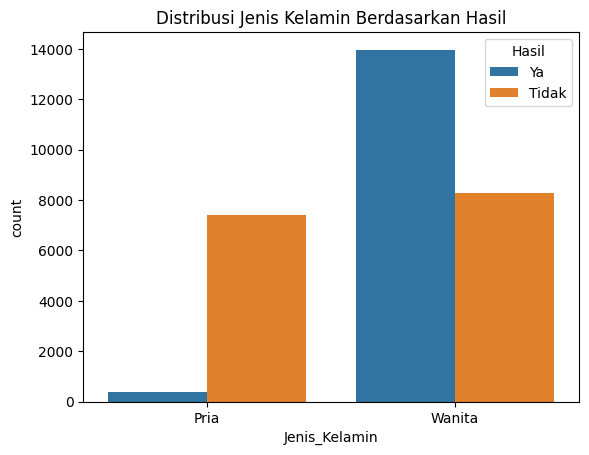

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribusi Jenis Kelamin
sns.countplot(data=df, x='Jenis_Kelamin', hue='Hasil')
plt.title("Distribusi Jenis Kelamin Berdasarkan Hasil")
plt.show()


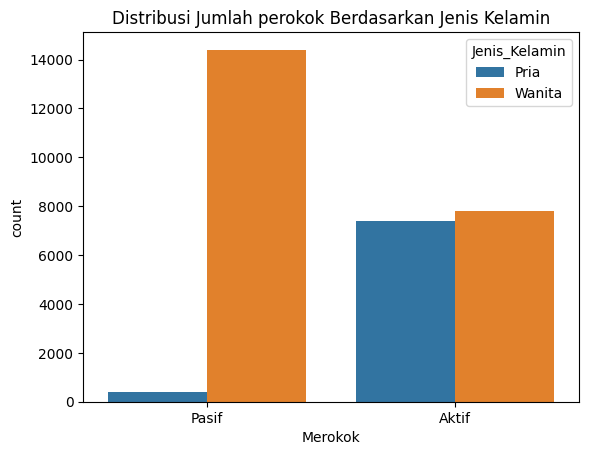

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribusi Jenis Kelamin
sns.countplot(data=df, x='Merokok', hue='Jenis_Kelamin')
plt.title("Distribusi Jumlah perokok Berdasarkan Jenis Kelamin")
plt.show()


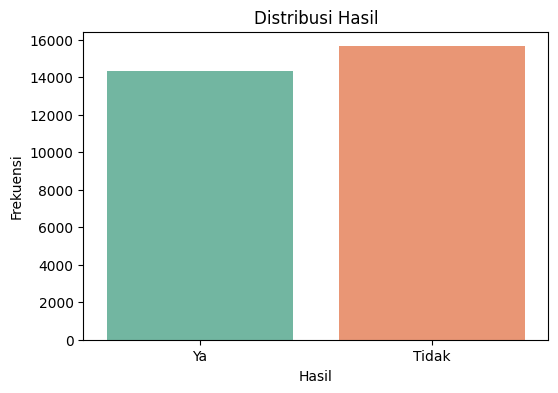

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualisasi distribusi label y dengan hue dan palette
plt.figure(figsize=(6,4))
sns.countplot(x='Hasil', data=df, hue='Hasil', palette='Set2', legend=False)
plt.title('Distribusi Hasil')
plt.xlabel('Hasil')
plt.ylabel('Frekuensi')
plt.show()


In [31]:
df.describe()

,No
count,30000.000000
mean,15000.500000
std,8660.398374
min,1.000000
25%,7500.750000
50%,15000.500000
75%,22500.250000
max,30000.000000


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   No                  30000 non-null  int64 
 1   Usia                30000 non-null  object
 2   Jenis_Kelamin       30000 non-null  object
 3   Merokok             30000 non-null  object
 4   Bekerja             30000 non-null  object
 5   Rumah_Tangga        30000 non-null  object
 6   Aktivitas_Begadang  30000 non-null  object
 7   Aktivitas_Olahraga  30000 non-null  object
 8   Asuransi            30000 non-null  object
 9   Penyakit_Bawaan     30000 non-null  object
 10  Hasil               30000 non-null  object
dtypes: int64(1), object(10)
memory usage: 2.5+ MB


## Encoding

In [33]:
from sklearn.preprocessing import LabelEncoder

# Inisialisasi encoder
label_encoder = LabelEncoder()

# Kolom yang perlu di-encode
columns_to_encode = ['Usia', 'Jenis_Kelamin', 'Merokok', 'Bekerja', 'Rumah_Tangga',
                     'Aktivitas_Begadang', 'Aktivitas_Olahraga', 'Asuransi', 'Penyakit_Bawaan', 'Hasil']

# Melakukan encoding
for column in columns_to_encode:
    df[column] = label_encoder.fit_transform(df[column])

print(df.head())


   No  Usia  Jenis_Kelamin  Merokok  Bekerja  Rumah_Tangga  \
0   1     1              0        1        0             1   
1   2     1              0        0        0             1   
2   3     0              0        0        0             1   
3   4     1              0        0        1             0   
4   5     0              1        1        1             0   

   Aktivitas_Begadang  Aktivitas_Olahraga  Asuransi  Penyakit_Bawaan  Hasil  
0                   1                   1         0                1      1  
1                   1                   0         0                0      0  
2                   1                   0         0                1      0  
3                   0                   0         0                0      0  
4                   0                   1         1                0      1  


## Normalisasi

In [34]:
from sklearn.preprocessing import MinMaxScaler

# Inisialisasi scaler
scaler = MinMaxScaler()

# Kolom yang akan dinormalisasi (semua kolom numerik)
columns_to_normalize = ['No', 'Usia', 'Jenis_Kelamin', 'Merokok', 'Bekerja',
                        'Rumah_Tangga', 'Aktivitas_Begadang', 'Aktivitas_Olahraga',
                        'Asuransi', 'Penyakit_Bawaan']

# Normalisasi data
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

# Menampilkan hasil
print(df.head())


         No  Usia  Jenis_Kelamin  Merokok  Bekerja  Rumah_Tangga  \
0  0.000000   1.0            0.0      1.0      0.0           1.0   
1  0.000033   1.0            0.0      0.0      0.0           1.0   
2  0.000067   0.0            0.0      0.0      0.0           1.0   
3  0.000100   1.0            0.0      0.0      1.0           0.0   
4  0.000133   0.0            1.0      1.0      1.0           0.0   

   Aktivitas_Begadang  Aktivitas_Olahraga  Asuransi  Penyakit_Bawaan  Hasil  
0                 1.0                 1.0       0.0              1.0      1  
1                 1.0                 0.0       0.0              0.0      0  
2                 1.0                 0.0       0.0              1.0      0  
3                 0.0                 0.0       0.0              0.0      0  
4                 0.0                 1.0       1.0              0.0      1  


## train & split

In [35]:
from sklearn.model_selection import train_test_split
X = df.drop('Hasil', axis=1)
y = df['Hasil']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [36]:
X_train.shape

(24000, 10)

In [37]:
X_test.shape

(6000, 10)

In [38]:
X_train[:10]

,No,Usia,Jenis_Kelamin,Merokok,Bekerja,Rumah_Tangga,Aktivitas_Begadang,Aktivitas_Olahraga,Asuransi,Penyakit_Bawaan
21753,0.725124,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
251,0.008367,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0
22941,0.764725,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
618,0.020601,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
17090,0.569686,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
6362,0.212074,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
24680,0.822694,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
28329,0.944331,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0
15874,0.529151,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
22653,0.755125,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


## Build Model Random Forest

In [39]:
from sklearn.ensemble import RandomForestClassifier

# Inisialisasi model Random Forest
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Melatih model menggunakan data pelatihan
model_rf.fit(X_train, y_train)

print("Model Random Forest telah berhasil dilatih.")


Model Random Forest telah berhasil dilatih.


In [42]:
from sklearn.metrics import classification_report

y_pred = model_rf.predict(X_test)

y_pred = y_pred.astype(int)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91      3075
           1       0.91      0.90      0.91      2925

    accuracy                           0.91      6000
   macro avg       0.91      0.91      0.91      6000
weighted avg       0.91      0.91      0.91      6000



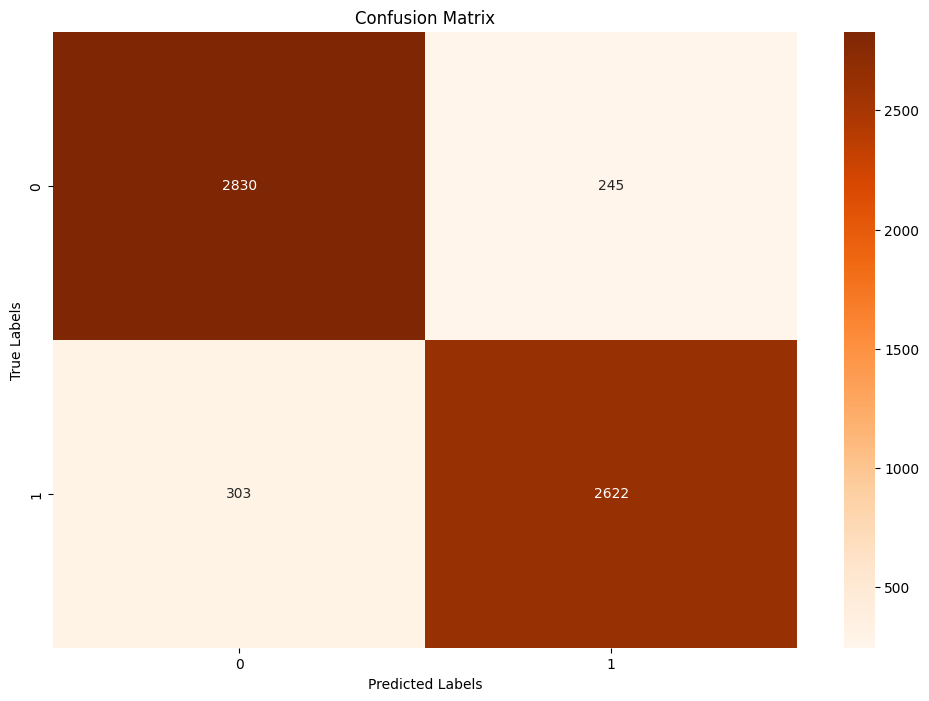

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['0', '1'],
            yticklabels=['0', '1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
